In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!ls ../../kaggle/input/hackerearth-carnival-wars-challenge


sample_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test_data=pd.read_csv("../../kaggle/input/hackerearth-carnival-wars-challenge/test.csv")

In [ ]:
data=pd.read_csv("../../kaggle/input/hackerearth-carnival-wars-challenge/train.csv")

In [ ]:
data.isnull().sum(axis=0)

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [ ]:
test_data.isnull().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [ ]:
data.drop(data[data.Selling_Price.isnull()].index, inplace=True)

In [ ]:
data.isnull().sum(axis=0)

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [ ]:
print(data.shape, test_data.shape)

(6327, 15) (3430, 14)


In [ ]:
labels=data["Selling_Price"]
data.drop("Selling_Price", axis=1, inplace=True)

In [ ]:
# data=
data=pd.concat([data, test_data], axis=0)
data.shape

(9757, 14)

In [ ]:
data.head(3)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0


In [ ]:
data.describe(include=['O'])

,Product_id,instock_date,Customer_name,Loyalty_customer,Product_Category
count,9757,9757,9497,9757,9757
unique,9757,7664,8927,2,10
top,NKCEYYX9BC4NZN2K,2016-03-29 21:55:43.000,Legend,Yes,Pet_care
freq,1,7,2,5949,1025


In [ ]:
data.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
count,9751.000000,9757.000000,9757.000000,9757.000000,9720.000000,9523.000000,9548.000000,9705.000000,9416.000000
mean,25.425187,198.254279,0.652352,50.569232,0.142284,264.952221,10.254504,3502.293251,6362.493309
std,14.352011,169.785262,1.032715,28.917136,0.349359,124.808461,4.288896,2188.640210,3667.385509
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,163.000000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1864.000000,3883.000000
50%,25.000000,128.000000,0.000000,50.000000,0.000000,252.000000,10.000000,3128.000000,5558.500000
75%,38.000000,389.000000,2.000000,76.000000,0.000000,317.000000,14.000000,4668.000000,8003.250000
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000


In [ ]:
from collections import Counter

def data_analysis(data):
    features = [_ for _ in data.columns]
    print("SHAPE OF DATA :", data.shape, end="\n\n")
    for feature in features:
        print("#####", feature, "#####", sep="\t")
        print("\tNo of null values :", data[feature].isnull().sum(), sep="\t")
        print("\tNo of unique values :", len(data[feature].unique()), sep="\t")
        print("\tDataType :", data[feature].dtypes, sep="\t")
        print("\tTop frequency :", "{} ".format(Counter(data[feature]).most_common(1)[0]))
        if(data[feature].dtypes!='O'):
            print("\tRange :", "[{}, {}]".format(data[feature].min(), data[feature].max()), sep="\t")
            dat=data.copy()
            dat[feature] = np.where(dat[feature].isnull(), 0, 1)
            
    
    
        
        
        
        
        
        print("\n")
    
data_analysis(test_data)

SHAPE OF DATA : (3430, 14)

#####	Product_id	#####
	No of null values :	0
	No of unique values :	3430
	DataType :	object
	Top frequency : ('SCHE4YSTDVPVZVXW', 1) 


#####	Stall_no	#####
	No of null values :	1
	No of unique values :	51
	DataType :	float64
	Top frequency : (12.0, 89) 
	Range :	[1.0, 50.0]


#####	instock_date	#####
	No of null values :	0
	No of unique values :	3096
	DataType :	object
	Top frequency : ('2015-08-22 17:36:19.000', 5) 


#####	Market_Category	#####
	No of null values :	0
	No of unique values :	224
	DataType :	int64
	Top frequency : (23, 169) 
	Range :	[0, 471]


#####	Customer_name	#####
	No of null values :	53
	No of unique values :	3320
	DataType :	object
	Top frequency : (nan, 53) 


#####	Loyalty_customer	#####
	No of null values :	0
	No of unique values :	2
	DataType :	object
	Top frequency : ('Yes', 2087) 


#####	Product_Category	#####
	No of null values :	0
	No of unique values :	10
	DataType :	object
	Top frequency : ('Educational', 355) 


#####	Gr

In [ ]:
data["Minimum_price"].fillna(data["Minimum_price"].min(), inplace=True)

In [ ]:
data["Discount_avail"].fillna(0, inplace=True)

In [ ]:
data["Maximum_price"].fillna(data["Maximum_price"].max(), inplace=True)

In [ ]:
data["charges_1"]=data["charges_1"].fillna(data["charges_1"].mean())

In [ ]:
data["charges_2 (%)"]=data["charges_2 (%)"].fillna(data["charges_2 (%)"].mean())

In [ ]:
data["Stall_no"]=data["Stall_no"].fillna(data["Stall_no"].min())
# data["Stall_no"].mode()

In [ ]:
from collections import Counter

def data_analysis(data):
    features = [_ for _ in data.columns]
    print("SHAPE OF DATA :", data.shape, end="\n\n")
    for feature in features:
        print("#####", feature, "#####", sep="\t")
        print("\tNo of null values :", data[feature].isnull().sum(), sep="\t")
        print("\tNo of unique values :", len(data[feature].unique()), sep="\t")
        print("\tDataType :", data[feature].dtypes, sep="\t")
        print("\tTop frequency :", "{} ".format(Counter(data[feature]).most_common(1)[0]))
        if(data[feature].dtypes!='O'):
            print("\tRange :", "[{}, {}]".format(data[feature].min(), data[feature].max()), sep="\t")
            dat=data.copy()
            dat[feature] = np.where(dat[feature].isnull(), 0, 1)
            
        
        print("\n")
    
data_analysis(data)

SHAPE OF DATA : (9757, 14)

#####	Product_id	#####
	No of null values :	0
	No of unique values :	9757
	DataType :	object
	Top frequency : ('BRAE2NF6JA5GUEXG', 1) 


#####	Stall_no	#####
	No of null values :	0
	No of unique values :	50
	DataType :	float64
	Top frequency : (20.0, 226) 
	Range :	[1.0, 50.0]


#####	instock_date	#####
	No of null values :	0
	No of unique values :	7664
	DataType :	object
	Top frequency : ('2016-03-29 21:55:43.000', 7) 


#####	Market_Category	#####
	No of null values :	0
	No of unique values :	275
	DataType :	int64
	Top frequency : (23, 493) 
	Range :	[0, 471]


#####	Customer_name	#####
	No of null values :	260
	No of unique values :	8928
	DataType :	object
	Top frequency : (nan, 260) 


#####	Loyalty_customer	#####
	No of null values :	0
	No of unique values :	2
	DataType :	object
	Top frequency : ('Yes', 5949) 


#####	Product_Category	#####
	No of null values :	0
	No of unique values :	10
	DataType :	object
	Top frequency : ('Pet_care', 1025) 


#####	G

In [ ]:
data.isnull().sum()

Product_id            0
Stall_no              0
instock_date          0
Market_Category       0
Customer_name       260
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail        0
charges_1             0
charges_2 (%)         0
Minimum_price         0
Maximum_price         0
dtype: int64

In [ ]:
data.drop(["Product_id", "Customer_name", "instock_date"], axis=1, inplace=True)

In [ ]:
data.head(3)

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0
1,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0
2,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

scaler=MinMaxScaler()

In [ ]:
dummies=pd.DataFrame(pd.get_dummies(data["Product_Category"]))
# print(product_category.fit_transform([data["Product_Category"]]))
dummies

,Child_care,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,1,0,0
3426,0,0,0,0,0,0,0,0,0,1
3427,0,0,1,0,0,0,0,0,0,0
3428,1,0,0,0,0,0,0,0,0,0


In [ ]:
cust_loyl=LabelEncoder()
data["Loyalty_customer"]=cust_loyl.fit_transform(data["Loyalty_customer"])

In [ ]:
data.drop(["Product_Category"], axis=1, inplace=True)

In [ ]:
final_data=pd.concat([data, dummies], axis=1)

In [ ]:
final_data.isnull().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Child_care          0
Cosmetics           0
Educational         0
Fashion             0
Home_decor          0
Hospitality         0
Organic             0
Pet_care            0
Repair              0
Technology          0
dtype: int64

In [ ]:
final_data=pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns)

In [ ]:
final_data.max()

Stall_no            1.0
Market_Category     1.0
Loyalty_customer    1.0
Grade               1.0
Demand              1.0
Discount_avail      1.0
charges_1           1.0
charges_2 (%)       1.0
Minimum_price       1.0
Maximum_price       1.0
Child_care          1.0
Cosmetics           1.0
Educational         1.0
Fashion             1.0
Home_decor          1.0
Hospitality         1.0
Organic             1.0
Pet_care            1.0
Repair              1.0
Technology          1.0
dtype: float64

In [ ]:
final_data.to_csv("preprocessed.csv")

# **Feature Engineering**

In [ ]:
final_data=pd.read_csv("preprocessed.csv")

In [ ]:
corr_mat=final_data.corr()
(corr_mat)

,Unnamed: 0,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,...,Child_care,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
Unnamed: 0,1.000000,0.008636,-0.011183,-0.004961,0.006631,-0.011997,0.007956,0.007225,0.027877,-0.013500,...,0.003570,0.004366,0.016680,0.002446,-0.003010,-0.012196,0.000228,-0.008003,-0.014642,0.010990
Stall_no,0.008636,1.000000,-0.004761,0.008280,-0.008043,0.000108,-0.009071,-0.010771,-0.004572,-0.004211,...,0.023775,0.016440,-0.000521,-0.010074,-0.014874,-0.002947,0.010446,-0.005690,-0.005215,-0.011867
Market_Category,-0.011183,-0.004761,1.000000,0.035251,-0.034151,-0.015518,-0.000340,0.020389,0.016264,0.197947,...,-0.002902,-0.008624,0.003097,0.001684,0.009469,-0.005769,-0.020192,0.009549,-0.009950,0.023783
Loyalty_customer,-0.004961,0.008280,0.035251,1.000000,0.027702,0.002061,-0.033876,0.001299,0.006451,0.087052,...,0.018994,0.020273,-0.003053,0.000978,-0.014763,-0.007268,-0.015328,0.003454,0.003155,-0.007416
Grade,0.006631,-0.008043,-0.034151,0.027702,1.000000,0.003397,-0.027944,-0.016962,-0.014495,-0.077857,...,-0.018075,0.002255,0.000914,-0.013425,0.009240,0.013695,0.010578,0.014352,-0.007988,-0.011446
Demand,-0.011997,0.000108,-0.015518,0.002061,0.003397,1.000000,-0.003722,-0.003563,0.013698,-0.007230,...,-0.000093,0.007838,0.019963,0.000105,0.006294,-0.016003,-0.003354,-0.013657,-0.002099,0.001326
Discount_avail,0.007956,-0.009071,-0.000340,-0.033876,-0.027944,-0.003722,1.000000,-0.002242,0.018103,0.015812,...,0.011447,0.019825,-0.005007,0.000481,-0.002773,0.009527,0.001757,-0.020401,0.003564,-0.018425
charges_1,0.007225,-0.010771,0.020389,0.001299,-0.016962,-0.003563,-0.002242,1.000000,0.270976,0.022753,...,0.091184,-0.041378,-0.336761,0.283786,-0.036429,0.024784,-0.369639,-0.315276,-0.044622,0.754878
charges_2 (%),0.027877,-0.004572,0.016264,0.006451,-0.014495,0.013698,0.018103,0.270976,1.000000,0.014641,...,0.060601,0.336806,0.057507,0.274531,0.251955,-0.057230,-0.243559,-0.322737,-0.409852,0.066623
Minimum_price,-0.013500,-0.004211,0.197947,0.087052,-0.077857,-0.007230,0.015812,0.022753,0.014641,1.000000,...,0.016592,0.009147,-0.014669,0.006384,-0.000040,-0.008964,-0.022710,0.009612,-0.005262,0.009249


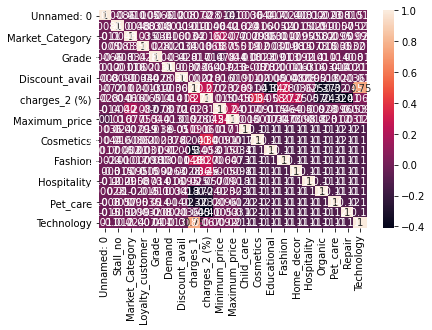

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

g=sn.heatmap(corr_mat, annot=True)
plt.show()

In [ ]:
target_scaler=MinMaxScaler()
pp_labels=target_scaler.fit_transform(pd.DataFrame(labels))

In [ ]:
labels.shape

(6327,)

In [ ]:
trial_data=pd.concat([final_data[:6327], pd.DataFrame(target_scaler.fit_transform(pd.DataFrame(labels)) )],axis=1)
trial_data

,Unnamed: 0,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,...,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology,0
0,0,0.734694,0.004246,1.0,0.333333,0.676768,0.0,0.502732,0.6250,0.169634,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357078
1,1,0.755102,0.050955,1.0,0.000000,0.505051,0.0,0.540984,0.6875,0.426304,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.534270
2,2,0.163265,0.949045,1.0,0.000000,0.090909,0.0,0.273224,0.5000,0.327152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447659
3,3,1.000000,0.048832,1.0,0.666667,0.474747,0.0,0.080146,0.7500,0.289493,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665187
4,4,0.122449,0.133758,1.0,0.333333,0.343434,1.0,0.202186,0.1875,0.138176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.242816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,6322,0.326531,0.050955,1.0,0.000000,0.464646,0.0,0.936248,0.5625,0.464930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.569322
6323,6323,0.408163,0.116773,1.0,0.000000,0.343434,0.0,0.307832,0.2500,0.202685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368084
6324,6324,0.714286,0.760085,0.0,1.000000,0.282828,0.0,0.333333,0.1250,0.301610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.567279
6325,6325,0.530612,0.959660,1.0,0.000000,0.070707,0.0,0.304189,0.1250,0.246487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.397967


In [ ]:
pp_labels.max()

1.0

In [ ]:
trial_data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
trial_data.corr()

,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,...,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology,0
Stall_no,1.000000,-0.006150,0.008030,-0.004214,0.002333,-0.019583,-0.010586,-0.004114,-0.000665,0.025986,...,0.016923,0.000701,-0.027379,-0.012203,-0.005640,-0.002119,0.002494,0.001251,0.000490,0.011465
Market_Category,-0.006150,1.000000,0.033291,-0.035902,-0.018040,-0.003017,0.018831,0.024590,0.194795,0.071724,...,0.005947,-0.000715,0.003991,0.008043,-0.009166,-0.017904,-0.002492,-0.006523,0.018484,0.138711
Loyalty_customer,0.008030,0.033291,1.000000,0.026115,0.004703,-0.022246,0.006219,0.012041,0.093337,0.056658,...,0.026693,-0.004730,0.006969,-0.021895,-0.012282,-0.014440,0.005800,0.002612,-0.006136,0.095660
Grade,-0.004214,-0.035902,0.026115,1.000000,0.010543,-0.026456,-0.024321,-0.015797,-0.079290,0.030009,...,-0.009063,0.005420,-0.016269,0.001814,0.022438,0.014521,0.019760,-0.009014,-0.014230,0.086450
Demand,0.002333,-0.018040,0.004703,0.010543,1.000000,0.008965,-0.008417,0.017530,0.010479,0.020154,...,0.011031,0.021080,0.013235,0.002287,-0.022631,-0.001265,-0.016755,0.001621,-0.009034,-0.000601
Discount_avail,-0.019583,-0.003017,-0.022246,-0.026456,0.008965,1.000000,-0.004718,0.018090,0.012499,-0.024816,...,0.027671,-0.000377,-0.015697,0.007607,0.006954,0.004532,-0.025882,-0.002584,-0.013718,-0.510635
charges_1,-0.010586,0.018831,0.006219,-0.024321,-0.008417,-0.004718,1.000000,0.263045,0.019537,0.031392,...,-0.041853,-0.331609,0.278963,-0.034578,0.026557,-0.367873,-0.316108,-0.045396,0.753462,0.052377
charges_2 (%),-0.004114,0.024590,0.012041,-0.015797,0.017530,0.018090,0.263045,1.000000,0.008821,0.009833,...,0.343792,0.054118,0.271864,0.251872,-0.056286,-0.237269,-0.323508,-0.401793,0.060778,0.008928
Minimum_price,-0.000665,0.194795,0.093337,-0.079290,0.010479,0.012499,0.019537,0.008821,1.000000,0.191226,...,0.009442,-0.018283,0.008728,0.000185,-0.002902,-0.022928,0.012508,0.001918,0.004226,0.693792
Maximum_price,0.025986,0.071724,0.056658,0.030009,0.020154,-0.024816,0.031392,0.009833,0.191226,1.000000,...,-0.001264,-0.001805,0.010884,-0.013433,0.003271,-0.027690,-0.016085,0.005865,0.022480,0.220067


In [ ]:
final_data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.linear_model import Lasso


In [ ]:

sel_ = SelectFromModel(Lasso())
sel_.fit(final_data[:6327], labels)
final_features=final_data.columns[sel_.get_support()]
final_data=final_data[final_features]
final_data

,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,1.0,0.333333,0.676768,0.0,0.502732,0.169634,0.077580,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.505051,0.0,0.540984,0.426304,0.173728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.000000,0.090909,0.0,0.273224,0.327152,0.121844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.666667,0.474747,0.0,0.080146,0.289493,0.352112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.333333,0.343434,1.0,0.202186,0.138176,0.155126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,1.0,0.000000,0.383838,0.0,0.030965,0.175949,0.076915,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9753,1.0,1.000000,0.161616,0.0,0.744991,0.192446,0.237719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9754,1.0,0.000000,0.353535,0.0,0.091075,0.040332,0.182970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9755,1.0,0.000000,0.626263,0.0,0.409836,0.083964,0.085287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

sel_ = VarianceThreshold()
sel_.fit(final_data[:6327], labels)
final_features=final_data.columns[sel_.get_support()]
final_data=final_data[final_features]
final_data

,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
0,1.0,0.333333,0.676768,0.0,0.502732,0.169634,0.077580,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.505051,0.0,0.540984,0.426304,0.173728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.000000,0.090909,0.0,0.273224,0.327152,0.121844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.666667,0.474747,0.0,0.080146,0.289493,0.352112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.333333,0.343434,1.0,0.202186,0.138176,0.155126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,1.0,0.000000,0.383838,0.0,0.030965,0.175949,0.076915,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9753,1.0,1.000000,0.161616,0.0,0.744991,0.192446,0.237719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9754,1.0,0.000000,0.353535,0.0,0.091075,0.040332,0.182970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9755,1.0,0.000000,0.626263,0.0,0.409836,0.083964,0.085287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_data.shape

(9757, 15)

In [ ]:
from xgboost import XGBRegressor
data=pd.read_csv("../../kaggle/input/hackerearth-carnival-wars-challenge/train.csv")
data.drop(data[data.Selling_Price.isnull()].index, inplace=True)
xgb=XGBRegressor()
xgb.fit(final_data[:6327], data["Selling_Price"])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
predictions=xgb.predict(final_data[6327:])
predictions

array([ 3274.5195,  1939.6816, 11883.88  , ...,  5906.0337,  3649.611 ,
        1002.2335], dtype=float32)

In [ ]:
predictions[predictions<0]=0

NameError: name 'prediction' is not defined

In [ ]:

test_data=pd.read_csv("../../kaggle/input/hackerearth-carnival-wars-challenge/test.csv")
predictions=pd.DataFrame({"Selling_Price":predictions})
predictions=pd.concat([test_data["Product_id"], predictions], axis=1)
predictions.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3274.519531
1,ACCEGCATKHNRXUHW,1939.681641
2,NKCE6GJ5XVJDXNNZ,11883.879883
3,NKCEB8BK3ZXDHDHM,9401.384766
4,TOPEFDXSAHRNPF94,5523.787598


In [ ]:

predictions.to_csv("prediction_xgb_1.csv")

In [ ]:
!ls

__notebook_source__.ipynb  prediction_xgb_1.csv  preprocessed.csv


In [ ]:
import os
os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'prediction_xgb_1.csv')

/kaggle/working/prediction_xgb_1.csv

In [ ]:
test=pd.read_csv("../../kaggle/input/hackerearth-carnival-wars-challenge/sample_submission.csv")
test.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [ ]:
len(data)

In [ ]:
6368-5441

In [ ]:
import matplotlib.pyplot as plt
for feature in features_with_na:
    dat = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
#     dat[feature] = np.where(dat[feature].isnull(), 100, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    dat.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

In [ ]:

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

In [ ]:
for feature in discrete_feature:
    dat=data.copy()
    dat.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling_Price')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

In [ ]:
for feature in continuous_feature:
    dat=data.copy()
    dat[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

In [ ]:
data["Stall_no"].isnull().sum()

In [ ]:
data["Stall_no"]=data["Stall_no"].fillna("0")

In [ ]:
data["Stall_no"].mean()